In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 

In [2]:
df=pd.read_csv('abalone.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
# To check null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
# To check duplicated values
df.duplicated().sum()

0

In [7]:
df_demo=df.drop('Sex',axis=1)

<Axes: >

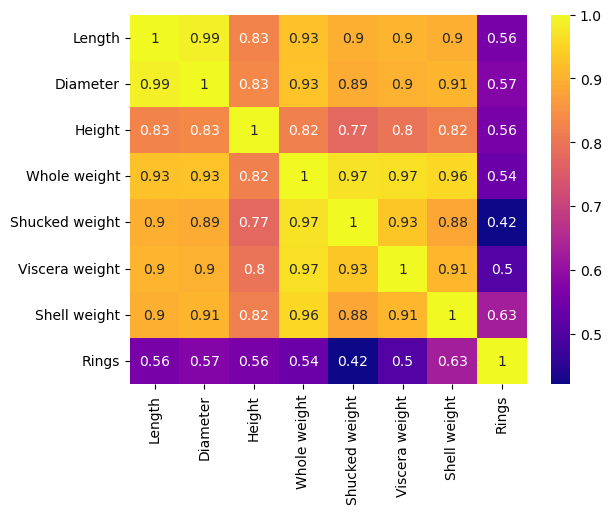

In [8]:
import seaborn as sns
corr=df_demo.corr()
sns.heatmap(corr,annot=True,cmap='plasma')


In [9]:
df['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='Count'>

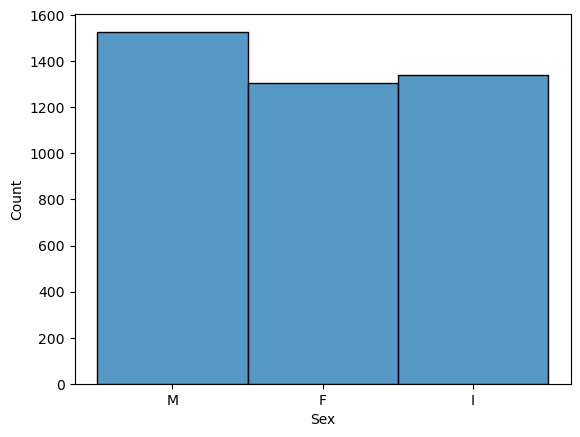

In [10]:
sns.histplot(df['Sex'])

In [11]:
df['Sex']=df['Sex'].map({'M':0,'F':1,'I':2})

In [12]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<Axes: xlabel='Rings', ylabel='Count'>

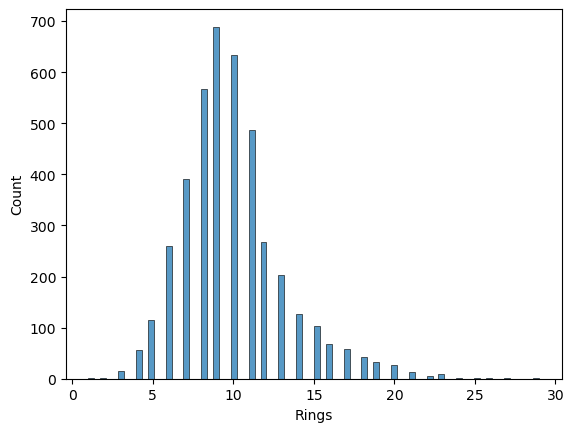

In [13]:
sns.histplot(df['Rings'])

<Axes: xlabel='Length', ylabel='Rings'>

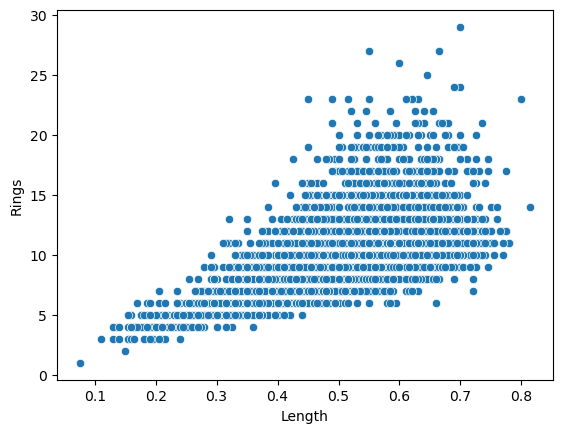

In [14]:
sns.scatterplot(x='Length',y='Rings',data=df)

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [16]:
x=df.drop('Rings',axis=1)
y=df['Rings']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [18]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [42]:
models={
'lr':LinearRegression(),
'dtr':DecisionTreeRegressor(),
'rf':RandomForestRegressor(),
'ad':AdaBoostRegressor(),
'gb':GradientBoostingRegressor(),
'xgb':XGBRegressor(),
'knn':KNeighborsRegressor(),
    'r':Ridge(),
    'l':Lasso()
}

In [43]:
for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'{name}: with MSE{mean_squared_error(y_test,y_pred)} and r2_score {r2_score(y_test,y_pred)}')
    

lr: with MSE4.866602835415658 and r2_score 0.5207469278112622
dtr: with MSE8.465709728867624 and r2_score 0.16631425800922872
rf: with MSE4.951292503987241 and r2_score 0.512406862838175
ad: with MSE8.606142659375175 and r2_score 0.15248471085727522
gb: with MSE4.728490895024085 and r2_score 0.534347908613912
xgb: with MSE5.472053432850163 and r2_score 0.4611233939639168
knn: with MSE5.439649122807018 and r2_score 0.46431450399807006
r: with MSE4.856926375590703 and r2_score 0.5216998457410494
l: with MSE7.099420118537635 and r2_score 0.3008636583599301


In [44]:
r=Ridge()
r.fit(x_train,y_train)
y_pred=r.predict(x_test)

In [46]:
# Prediction Model

def prediction(s,l,d,h,ww,sw,vw,shw):
    feat=np.array([[s,l,d,h,ww,sw,vw,shw]])
    predict=r.predict(feat).reshape(1,-1)
    return predict[0]
    

In [47]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [48]:
# Inputs for prediction model
s=2
l=3
d=3
h=2
ww=2
sw=4
vw=2
shw=3

ans=prediction(s,l,d,h,ww,sw,vw,shw)
print(ans)

[5.53509245]


In [49]:
import pickle
pickle.dump(r,open('model.pkl','wb'))